In [ ]:
import pandas as pad
import numpy as np
import glob
import soundfile
import os
import sys
import librosa.display as ld
import librosa
import librosa.display
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from IPython.display import Audio
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings ("ignore", category=DeprecationWarning)
RavdessData = "/content/drive/MyDrive/NLP/audio_speech_actors_01-24"

In [ ]:
import os
import pandas as pd  # Make sure you import the correct module name (pandas, not pad)

RavdessData = '/content/drive/MyDrive/NLP/audio_speech_actors_01-24'
ravdessDirectoryList = os.listdir(RavdessData)
fileEmotion = []
filePath = []

for dir in ravdessDirectoryList:
    actor_dir = os.path.join(RavdessData, dir)  # Use os.path.join to construct the correct path
    if os.path.isdir(actor_dir):  # Check if the directory exists
        actor = os.listdir(actor_dir)
        for file in actor:
            part = file.split('.')[0]
            part = part.split('-')
            fileEmotion.append(int(part[2]))
            filePath.append(os.path.join(actor_dir, file))  # Use os.path.join to construct the correct path
    else:
        print(f"Directory {actor_dir} does not exist.")

emotion_df = pd.DataFrame(fileEmotion, columns=['Emotions'])
path_df = pd.DataFrame(filePath, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

Directory /content/drive/MyDrive/NLP/audio_speech_actors_01-24/data_path.csv does not exist.
Directory /content/drive/MyDrive/NLP/audio_speech_actors_01-24/modelForPrediction1.sav does not exist.


In [ ]:
Ravdess_df.Emotions.replace({1: 'neutral', 2: 'calm', 3:'happy', 4:'sad', 5: 'angry', 6: 'fear', 7: 'disgust', 8: 'surprise'}, inplace = True)
Ravdess_df.head()

Emotions                                               Path
0  neutral  /content/drive/MyDrive/NLP/audio_speech_actors...
1  neutral  /content/drive/MyDrive/NLP/audio_speech_actors...
2  neutral  /content/drive/MyDrive/NLP/audio_speech_actors...
3  neutral  /content/drive/MyDrive/NLP/audio_speech_actors...
4     calm  /content/drive/MyDrive/NLP/audio_speech_actors...

In [ ]:
dataPath = pad.concat([Ravdess_df], axis = 0)
dataPath.to_csv("data_path.csv", index=False)
dataPath.head()

Emotions                                               Path
0  neutral  /content/drive/MyDrive/NLP/audio_speech_actors...
1  neutral  /content/drive/MyDrive/NLP/audio_speech_actors...
2  neutral  /content/drive/MyDrive/NLP/audio_speech_actors...
3  neutral  /content/drive/MyDrive/NLP/audio_speech_actors...
4     calm  /content/drive/MyDrive/NLP/audio_speech_actors...

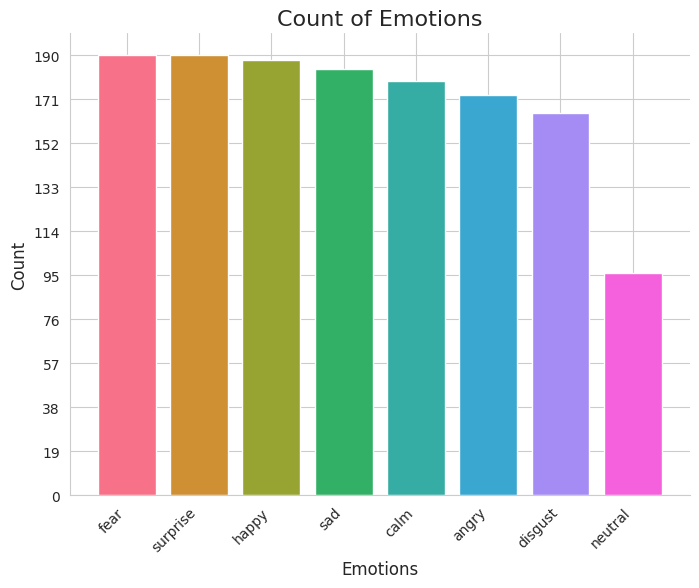

In [ ]:
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
plt.title('Count of Emotions', size=16)
emotion_counts = dataPath['Emotions'].value_counts()
emotions = emotion_counts.index
counts = emotion_counts.values
num_colors = len(emotions)
colors = sns.color_palette("husl", num_colors)
bars = plt.bar(emotions, counts, color=colors)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(np.arange(0, max(counts) + 1, step=max(counts) // 10))
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [ ]:
def createWaveplot (data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

In [ ]:
def createSpectrogram(data, sr, e):
    X = librosa.stft (data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure (figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emption'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

Audio, Waveplot and Spectogram for different emotions

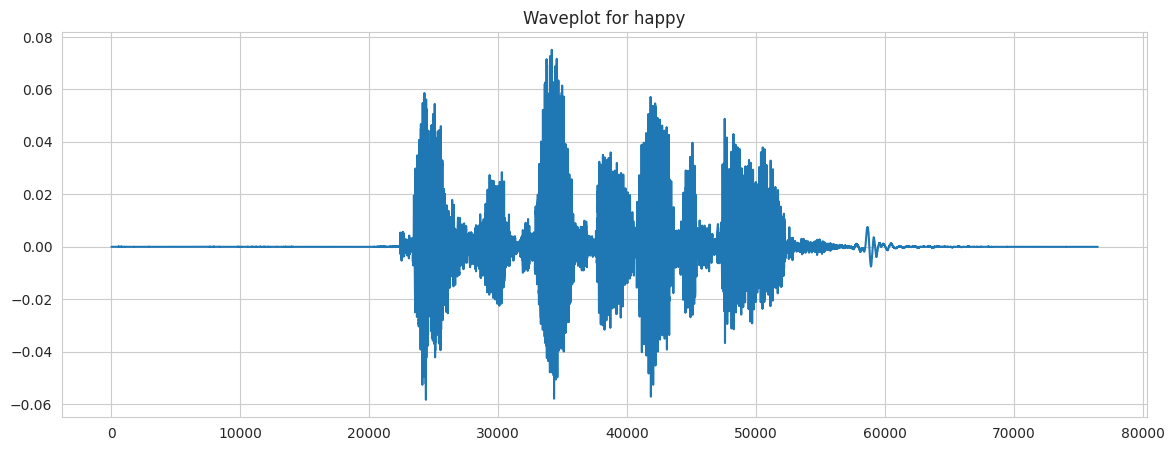

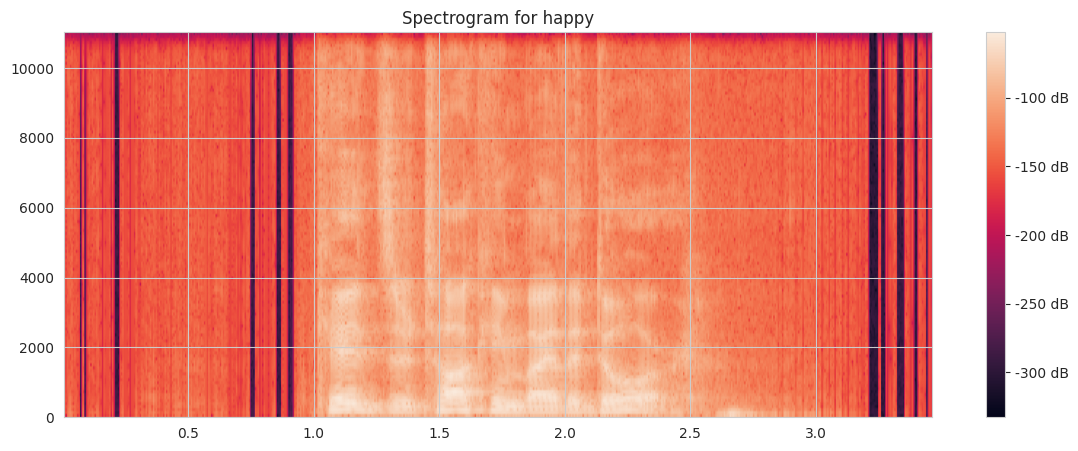

In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio

# Assuming you have a DataFrame called dataPath containing paths to audio files and their associated emotions

emotion = 'happy'
path = np.array(dataPath.Path[dataPath.Emotions==emotion])[1]
data, samplingRate = librosa.load(path)

# Create waveplot
plt.figure(figsize=(14, 5))
plt.plot(data)
plt.title('Waveplot for %s' % emotion)

# Create spectrogram
plt.figure(figsize=(14, 5))
plt.specgram(data, Fs=samplingRate)
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram for %s' % emotion)

# Play audio
Audio(data, rate=samplingRate)

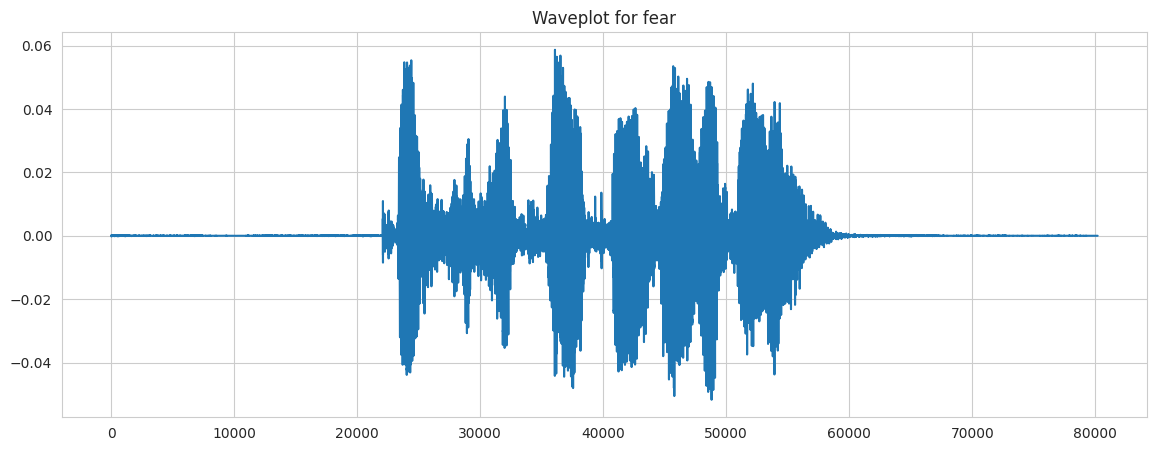

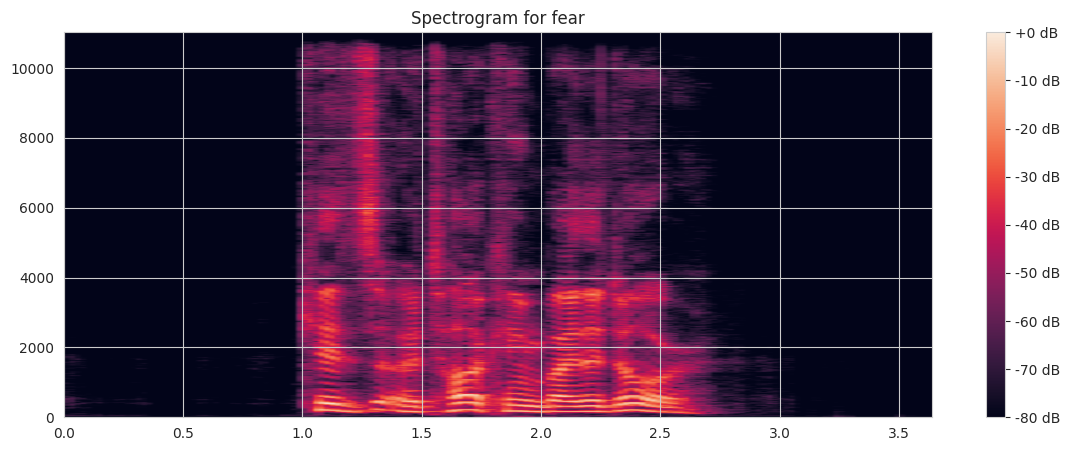

In [ ]:
emotion = 'fear'
path = np.array(dataPath.Path[dataPath.Emotions == emotion])[1]
data, samplingRate = librosa.load(path)

# Create waveplot
plt.figure(figsize=(14, 5))
plt.plot(data)
plt.title('Waveplot for %s' % emotion)

# Create spectrogram
plt.figure(figsize=(14, 5))
spec = np.abs(librosa.stft(data))
spec = librosa.amplitude_to_db(spec, ref=np.max)
plt.imshow(spec, aspect='auto', origin='lower', extent=[0, len(data)/samplingRate, 0, samplingRate/2])
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram for %s' % emotion)

# Play audio
Audio(data, rate=samplingRate)

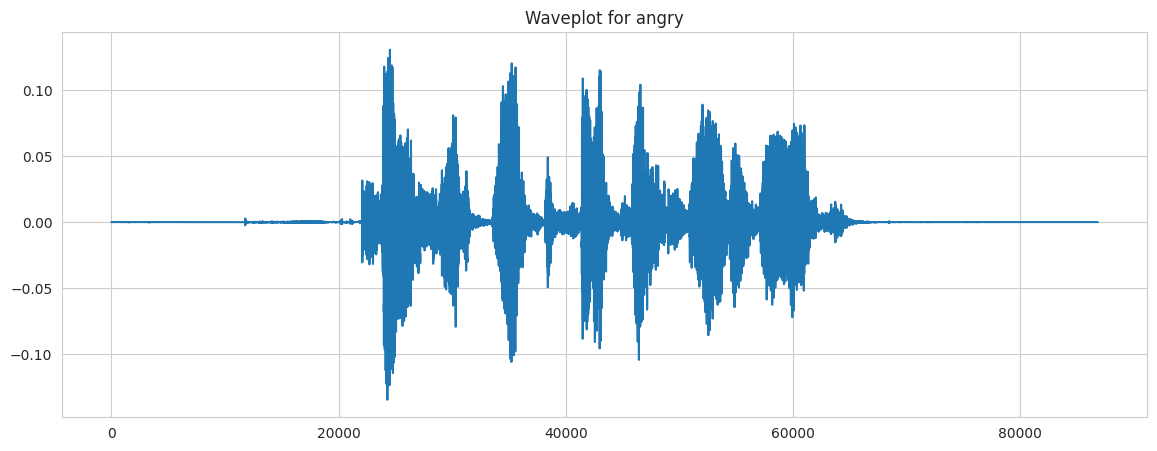

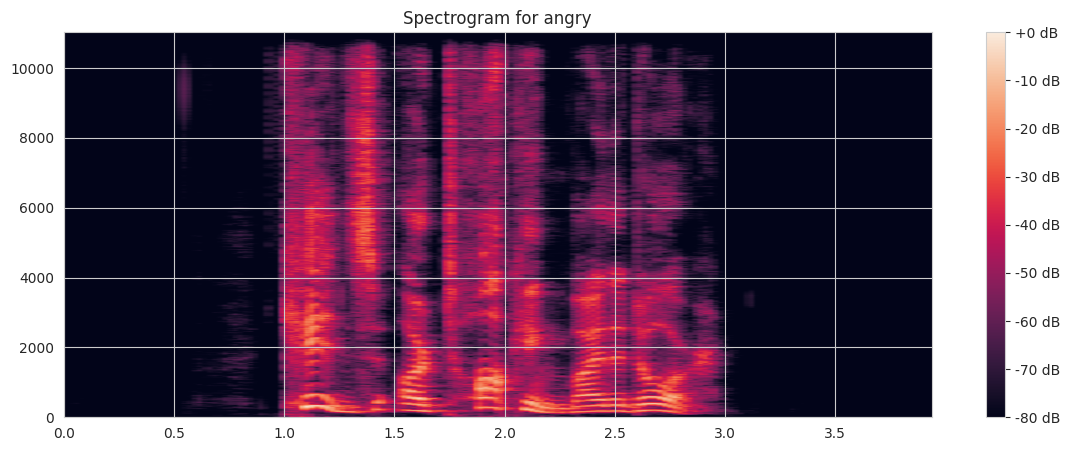

In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio

# Assuming you have a DataFrame called dataPath containing paths to audio files and their associated emotions

emotion = 'angry'
path = np.array(dataPath.Path[dataPath.Emotions == emotion])[1]
data, samplingRate = librosa.load(path)

# Create waveplot
plt.figure(figsize=(14, 5))
plt.plot(data)
plt.title('Waveplot for %s' % emotion)

# Create spectrogram
plt.figure(figsize=(14, 5))
spec = np.abs(librosa.stft(data))
spec = librosa.amplitude_to_db(spec, ref=np.max)
plt.imshow(spec, aspect='auto', origin='lower', extent=[0, len(data)/samplingRate, 0, samplingRate/2])
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram for %s' % emotion)

# Play audio
Audio(data, rate=samplingRate)


Applying various transformations to Audio data

In [ ]:
from scipy.signal import resample
def noise (data):
    noiseAmp = 0.035* np.random.uniform()*np.amax (data)
    data = data + noiseAmp*np.random.normal (size=data.shape [0])
    return data

def stretch(data, factor=1.2):
    # Stretch the data using resampling
    resampled = resample(data, int(len(data)*factor))
    return resampled

def shift (data):
    shiftRange = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll (data, shiftRange)

def pitch(data, samplingRate, pitchFactor=0.7):
    return librosa.effects.pitch_shift(data, samplingRate, pitchFactor)

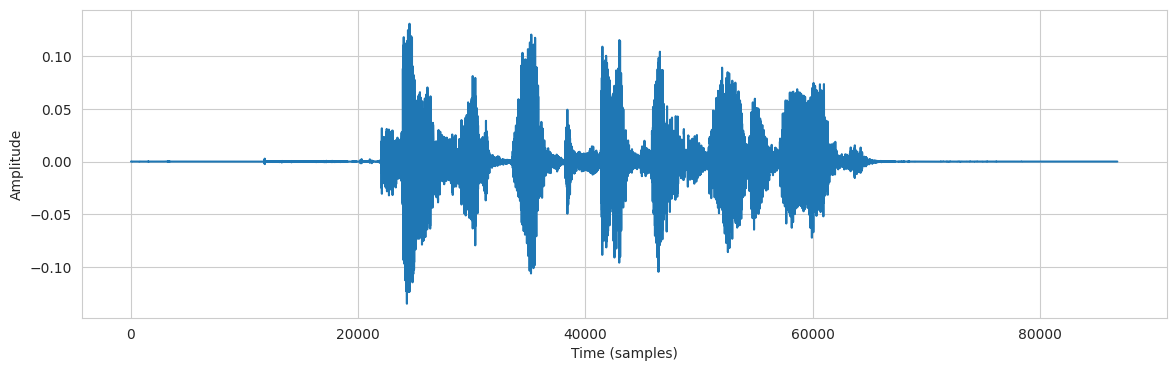

In [ ]:
# Apply noise to the data
x = noise(data)

# Create waveform plot
plt.figure(figsize=(14, 4))
plt.plot(data)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()

# Play audio with noise
Audio(x, rate=samplingRate)

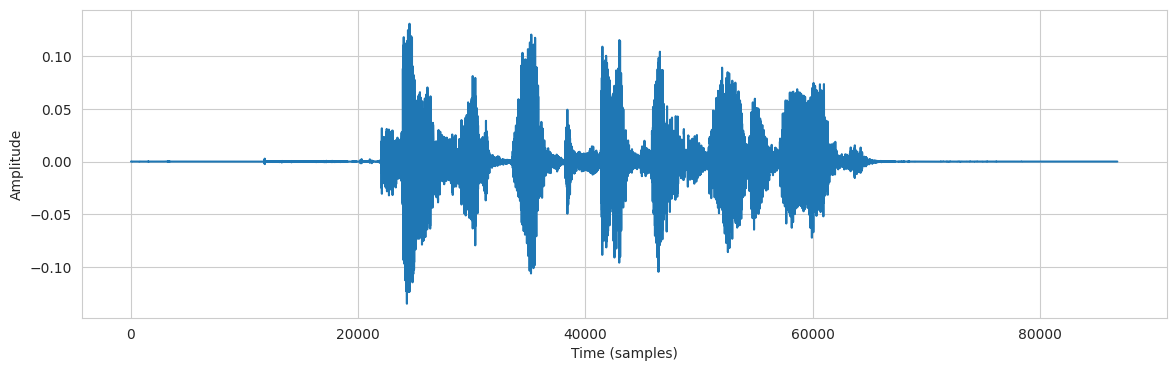

In [ ]:
x = stretch(data)

# Create waveform plot
plt.figure(figsize=(14, 4))
plt.plot(data)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()

# Play stretched audio
Audio(x, rate=samplingRate)

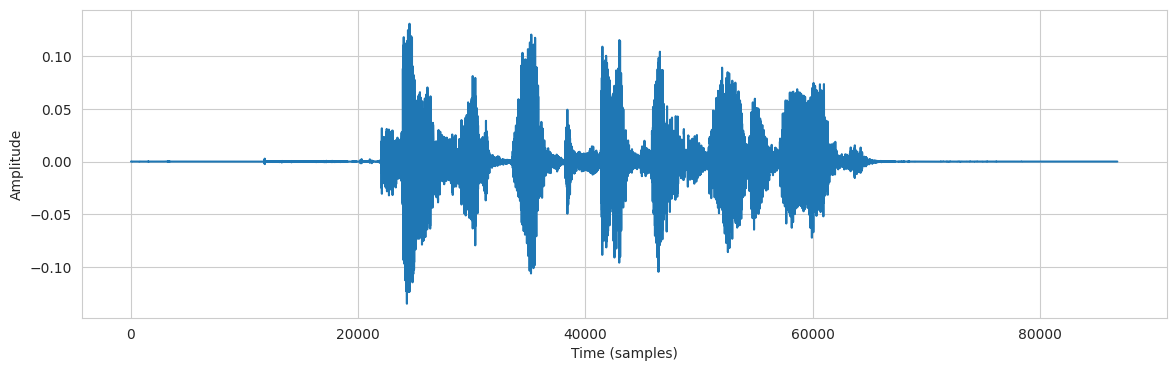

In [ ]:
x = shift(data)

# Create waveform plot
plt.figure(figsize=(14, 4))
plt.plot(data)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()

# Play audio with noise
Audio(x, rate=samplingRate)

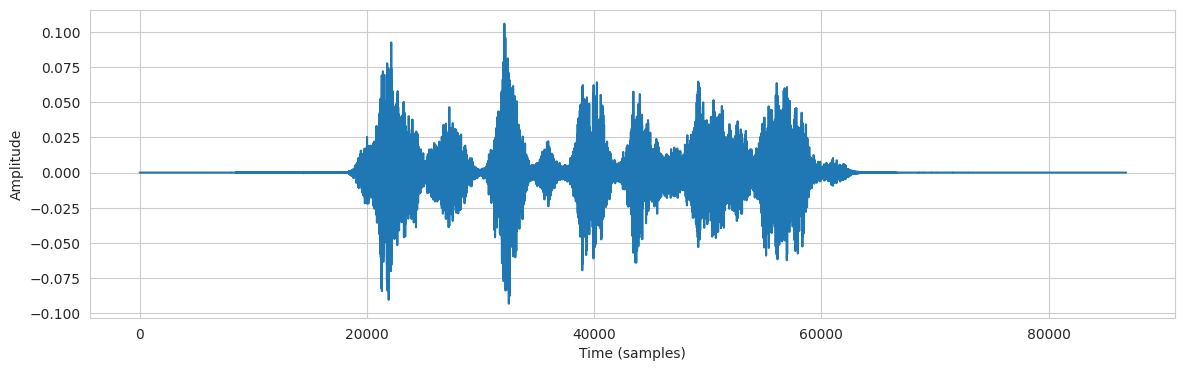

In [ ]:
y = x
# Shift the pitch of the audio signal by 6 semitones
y_shifted = librosa.effects.pitch_shift(y, sr=samplingRate, n_steps=6, bins_per_octave=12)

# Create waveform plot
plt.figure(figsize=(14, 4))
plt.plot(y_shifted)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()

# Play the shifted audio
Audio(y_shifted, rate=samplingRate)

In [ ]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
import os
root = "/content/drive/MyDrive/NLP/audio_speech_actors_01-24"
os.chdir(root)

In [ ]:
ls

Actor_01/  Actor_05/  Actor_09/  Actor_13/  Actor_17/  Actor_21/  data_path.csv
Actor_02/  Actor_06/  Actor_10/  Actor_14/  Actor_18/  Actor_22/  modelForPrediction1.sav
Actor_03/  Actor_07/  Actor_11/  Actor_15/  Actor_19/  Actor_23/
Actor_04/  Actor_08/  Actor_12/  Actor_16/  Actor_20/  Actor_24/


In [ ]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

 "extract_feature" which is designed to extract various audio features from a sound file

In [ ]:
#Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)
            result=np.hstack((result, mel))
    return result

mapping between emotion codes and their corresponding labels

In [ ]:
# Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

#Emotions to observe
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

In [ ]:
#Load the data and extract features for each sound file
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("/content/drive/MyDrive/NLP/audio_speech_actors_01-24/Actor_*/*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [ ]:
#Split the dataset
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

In [ ]:
x_train

array([[-5.15998291e+02,  3.80557861e+01, -2.76637363e+01, ...,
         2.38010011e-06,  1.90333708e-07,  9.06871822e-09],
       [-5.47911743e+02,  5.24813423e+01, -1.24850006e+01, ...,
         2.74692354e-07,  2.84786399e-08,  8.95840824e-09],
       [-6.83096802e+02,  6.05231934e+01,  6.56818151e+00, ...,
         3.78155249e-08,  9.73951941e-09,  7.50281703e-09],
       ...,
       [-7.19909485e+02,  8.32088318e+01, -6.93764257e+00, ...,
         3.81417493e-08,  7.65697017e-09,  5.76097481e-09],
       [-5.74662598e+02,  6.40886459e+01, -1.58507328e+01, ...,
         2.09008226e-06,  1.69682167e-07,  7.51935225e-09],
       [-7.30129639e+02,  6.50574951e+01,  7.85005903e+00, ...,
         5.32494511e-08,  1.01494537e-08,  6.70940326e-09]])

In [ ]:
#Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

(541, 181)


In [ ]:
#Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


In [ ]:
#Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.1, batch_size=300, epsilon=1e-08, hidden_layer_sizes=(600,), learning_rate='adaptive', max_iter=500)

In [ ]:
model.fit(x_train,y_train)

MLPClassifier(alpha=0.1, batch_size=300, hidden_layer_sizes=(600,),
              learning_rate='adaptive', max_iter=500)

In [ ]:
#Predict for the test set
expected_y = y_test
y_pred=model.predict(x_test)

In [ ]:
y_pred

array(['happy', 'calm', 'happy', 'calm', 'fearful', 'disgust', 'happy',
       'disgust', 'happy', 'fearful', 'fearful', 'calm', 'calm', 'happy',
       'happy', 'happy', 'disgust', 'fearful', 'calm', 'happy', 'happy',
       'calm', 'disgust', 'calm', 'disgust', 'calm', 'calm', 'calm',
       'disgust', 'disgust', 'happy', 'happy', 'calm', 'calm', 'happy',
       'calm', 'disgust', 'calm', 'happy', 'happy', 'happy', 'calm',
       'fearful', 'fearful', 'calm', 'calm', 'disgust', 'happy', 'happy',
       'happy', 'calm', 'disgust', 'fearful', 'fearful', 'disgust',
       'fearful', 'fearful', 'fearful', 'happy', 'calm', 'happy', 'happy',
       'calm', 'calm', 'happy', 'happy', 'disgust', 'disgust', 'disgust',
       'calm', 'happy', 'disgust', 'fearful', 'fearful', 'happy', 'calm',
       'fearful', 'happy', 'happy', 'calm', 'fearful', 'happy', 'happy',
       'fearful', 'fearful', 'happy', 'happy', 'disgust', 'disgust',
       'calm', 'happy', 'calm', 'disgust', 'fearful', 'calm', 'h

In [ ]:
print(metrics.confusion_matrix(expected_y, y_pred))

[[37  0  2  0]
 [ 3 31  2  8]
 [ 2  0 33  5]
 [ 4  2  3 49]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        calm       0.80      0.95      0.87        39
     disgust       0.94      0.70      0.81        44
     fearful       0.82      0.82      0.82        40
       happy       0.79      0.84      0.82        58

    accuracy                           0.83       181
   macro avg       0.84      0.83      0.83       181
weighted avg       0.84      0.83      0.83       181



In [ ]:
#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 82.87%


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
f1_score(y_test, y_pred,average=None)

array([0.87058824, 0.80519481, 0.825     , 0.81666667])

In [ ]:
import pandas as pd
df=pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df.head(10)

Actual Predicted
0    happy     happy
1     calm      calm
2    happy     happy
3     calm      calm
4     calm   fearful
5  disgust   disgust
6    happy     happy
7  disgust   disgust
8    happy     happy
9  fearful   fearful

In [ ]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction1.sav', 'wb') as f:
    pickle.dump(model,f)

In [ ]:
filename = 'modelForPrediction1.sav'
loaded_model = pickle.load(open(filename, 'rb')) # loading the model file from the storage
feature=extract_feature("/content/drive/MyDrive/NLP/audio_speech_actors_01-24/Actor_20/03-01-01-01-02-01-20.wav", mfcc=True, chroma=True, mel=True)
feature=feature.reshape(1,-1)
prediction=loaded_model.predict(feature)
prediction

array(['disgust'], dtype='<U7')

Real Time Application

In [ ]:
pip install SpeechRecognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 21.5 MB/s eta 0:00:00


In [ ]:
import speech_recognition as sr
import wave
# create an AudioFile object from the WAV file
audio_file = sr.AudioFile('/content/drive/MyDrive/NLP/audio_speech_actors_01-24/Actor_02/03-01-06-01-01-01-02.wav')
# instantiate the speech recognizer
recognizer = sr.Recognizer()
# extract audio data from the file
with audio_file as source:
    audio_data = recognizer.record(source)
# use the recognizer to convert audio to text
text = recognizer.recognize_google(audio_data)
# split the text into words
words = text.split()
# create a dictionary with the words and their counts
word_counts = {}
for word in words:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1
# print the dictionary
print(word_counts)

{'kids': 1, 'are': 1, 'talking': 1, 'by': 1, 'the': 1, 'door': 1}


In [ ]:
text = "This is a sample text to test if the script will kill or destroy the mood."

# List of threatening words
threatening_words = ['kill', 'murder', 'destroy', 'attack']

# Check if the text contains any threatening words
if any(word in text.lower() for word in threatening_words):
    print('Error: Text contains threatening words.')
else:
    # Split the text into words
    words = text.split()

    # Create a dictionary with the words and their counts
    word_counts = {}
    for word in words:
        # Convert word to lowercase to ensure case-insensitive counting
        word = word.lower()
        # Remove punctuation from the word
        word = ''.join(char for char in word if char.isalnum())
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

    # Print the dictionary
    print(word_counts)

Error: Text contains threatening words.


Accuracy: 82.87%


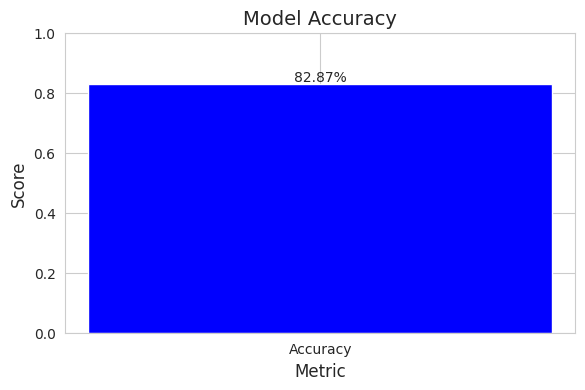

In [ ]:
# Calculate the accuracy of our model
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)

# Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Import required libraries for plotting
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 4))

# Create a bar chart
ax.bar(['Accuracy'], [accuracy], color='blue')

# Set the y-axis limit
ax.set_ylim(0, 1)

# Set the title and axis labels
ax.set_title('Model Accuracy', fontsize=14)
ax.set_xlabel('Metric', fontsize=12)
ax.set_ylabel('Score', fontsize=12)

# Add value labels on top of the bars
ax.bar_label(ax.containers[0], labels=[f'{accuracy * 100:.2f}%'])

# Adjust the spacing between subplots
plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.15)

# Show the plot
plt.show()

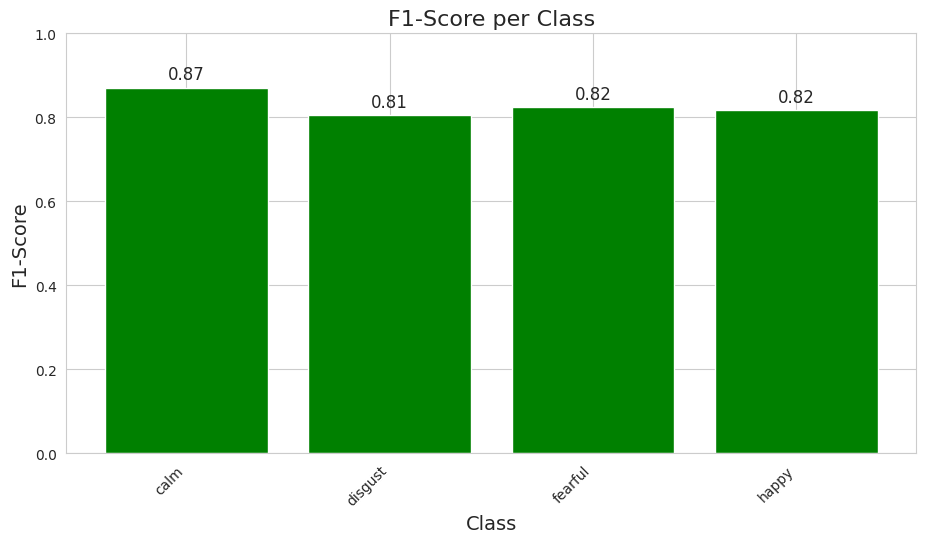

In [ ]:
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt

# Calculate F1-score for each class
f1_scores = f1_score(y_test, y_pred, average=None)

# Get the class labels
class_labels = np.unique(y_test)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar chart
x = np.arange(len(class_labels))
ax.bar(x, f1_scores, color='green')

# Set the x-ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(class_labels, rotation=45, ha='right')

# Set the y-axis limit
ax.set_ylim(0, 1)

# Set the title and axis labels
ax.set_title('F1-Score per Class', fontsize=16)
ax.set_xlabel('Class', fontsize=14)
ax.set_ylabel('F1-Score', fontsize=14)

# Add value labels on top of the bars
for i, score in enumerate(f1_scores):
    ax.text(i, score + 0.01, f'{score:.2f}', ha='center', va='bottom', fontsize=12)

# Adjust the spacing between subplots
plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.2)

# Show the plot
plt.show()

In [ ]:
from sklearn.metrics import recall_score
import numpy as np
import matplotlib.pyplot as plt
# Calculate recall for each class
recall_scores = recall_score(y_test, y_pred, average=None)
print("Recall Scores:")
for label, score in zip(class_labels, recall_scores):
    print(f"Class {label}: {score:.2f}")
print()

Recall Scores:
Class calm: 0.95
Class disgust: 0.70
Class fearful: 0.82
Class happy: 0.84



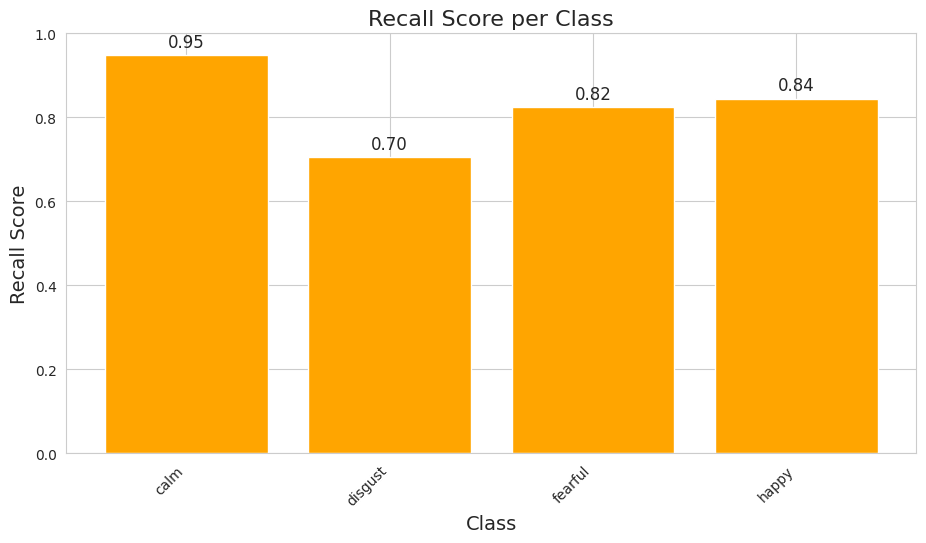

In [ ]:
# Get the class labels
class_labels = np.unique(y_test)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar chart
x = np.arange(len(class_labels))
ax.bar(x, recall_scores, color='orange')

# Set the x-ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(class_labels, rotation=45, ha='right')

# Set the y-axis limit
ax.set_ylim(0, 1)

# Set the title and axis labels
ax.set_title('Recall Score per Class', fontsize=16)
ax.set_xlabel('Class', fontsize=14)
ax.set_ylabel('Recall Score', fontsize=14)

# Add value labels on top of the bars
for i, score in enumerate(recall_scores):
    ax.text(i, score + 0.01, f'{score:.2f}', ha='center', va='bottom', fontsize=12)

# Adjust the spacing between subplots
plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.2)

# Show the plot
plt.show()

In [ ]:
from sklearn.metrics import precision_score
import numpy as np
import matplotlib.pyplot as plt
precision_scores = precision_score(y_test, y_pred, average=None)
print("Precision Scores:")
for label, score in zip(class_labels, precision_scores):
    print(f"Class {label}: {score:.2f}")
print()

Precision Scores:
Class calm: 0.80
Class disgust: 0.94
Class fearful: 0.82
Class happy: 0.79



Precision Scores:
Class calm: 0.80
Class disgust: 0.94
Class fearful: 0.82
Class happy: 0.79



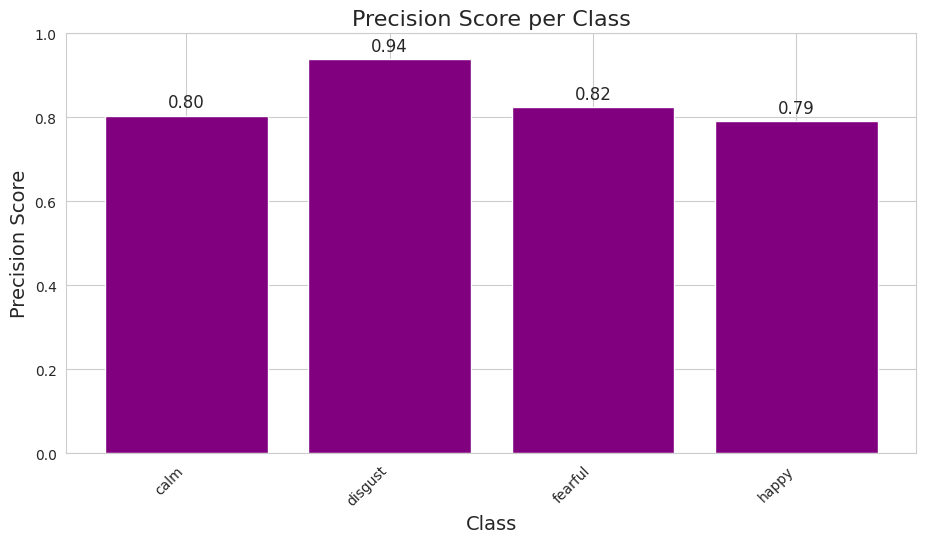

In [ ]:
# Get the class labels
class_labels = np.unique(y_test)

# Print the precision values
print("Precision Scores:")
for label, score in zip(class_labels, precision_scores):
    print(f"Class {label}: {score:.2f}")
print()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar chart
x = np.arange(len(class_labels))
ax.bar(x, precision_scores, color='purple')

# Set the x-ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(class_labels, rotation=45, ha='right')

# Set the y-axis limit
ax.set_ylim(0, 1)

# Set the title and axis labels
ax.set_title('Precision Score per Class', fontsize=16)
ax.set_xlabel('Class', fontsize=14)
ax.set_ylabel('Precision Score', fontsize=14)

# Add value labels on top of the bars
for i, score in enumerate(precision_scores):
    ax.text(i, score + 0.01, f'{score:.2f}', ha='center', va='bottom', fontsize=12)

# Adjust the spacing between subplots
plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.2)

# Show the plot
plt.show()

In [ ]:
# prompt: comparison of recall,precision,f1score,accuracy

import matplotlib.pyplot as plt
# Calculate the accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1_score = f1_score(y_test, y_pred, average='weighted')

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

# Create a bar chart to compare the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1_score]

plt.bar(metrics, values, color='lightblue')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Comparison of Evaluation Metrics')
plt.show()
